# E-Commerce Customer Segmentation Analysis

## Project Overview

### Business Problem
How can we segment our customer base to optimize marketing strategies and maximize revenue?

### Key Questions
- Who are our most valuable customers?
- Which customers are at risk of churning?
- How do purchasing behaviors differ across segments?
- What targeted strategies should we implement?

### Approach
Using RFM (Recency, Frequency, Monetary) analysis to segment customers based on purchasing behavior, then developing data-driven marketing recommendations for each segment.

### Expected Outcome
Identify distinct customer segments with actionable business strategies to increase revenue and improve retention.

## Links
### [Tableau DashBoard](https://public.tableau.com/app/profile/isaque.nascimento/viz/EcommerceFinalSprint/Dashboard1?publish=yes)
### [Presentation](https://drive.google.com/file/d/1qmkCmWkXI-gFJYvS4TZ2NfbkTI3-LOsn/view?usp=sharing)


## 1. Environment Setup & Data Loading

### 1.1 Notebook Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### 1.2 Data Loading & Initial Inspection

#### Load Dataset

In [4]:
df = pd.read_csv('datasets/ecommerce_dataset_us.csv', sep='\t')

In [5]:
print('========== First 5 rows ==========')
df.head()

========== First 5 rows ==========


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Basic data exploration

In [7]:
print(f"Dataset shape: {df.shape}")
print(f"Unique customers: {df['CustomerID'].nunique()}")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

Dataset shape: (541909, 7)
Unique customers: 4372
Date range: 01/02/2019 10:00 to 12/21/2018 17:41


### 1.3 Data Quality Assessment

#### Checking missing values

In [8]:
display(df[df['CustomerID'].isnull()])
display(df[df['Description'].isnull()])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,11/29/2018 11:52,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/07/2019 10:26,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/07/2019 10:26,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/07/2019 10:26,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,12/07/2019 10:26,10.79,NaN


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,11/29/2018 11:52,0.0,NaN
1970,536545,21134,NaN,1,11/29/2018 14:32,0.0,NaN
1971,536546,22145,NaN,1,11/29/2018 14:33,0.0,NaN
1972,536547,37509,NaN,1,11/29/2018 14:33,0.0,NaN
1987,536549,85226A,NaN,1,11/29/2018 14:34,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/05/2019 18:26,0.0,NaN
535326,581203,23406,NaN,15,12/05/2019 18:31,0.0,NaN
535332,581209,21620,NaN,6,12/05/2019 18:35,0.0,NaN
536981,581234,72817,NaN,27,12/06/2019 10:33,0.0,NaN


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('Int64')

#check data types after conversion
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
dtype: object

#### Anomaly Detection 

In [10]:
# Check for negative values in Quantity and UnitPrice
negative_qty = df[df['Quantity'] < 0]
negative_price = df[df['UnitPrice'] < 0]

print(f"Records with negative quantity: {len(negative_qty)}")
print(f"Records with negative unit price: {len(negative_price)}")

if len(negative_qty) > 0:
    print("\nSample records with negative quantity:")
    display(negative_qty.head())

if len(negative_price) > 0:
    print("\nSample records with negative unit price:")
    display(negative_price.head())

Records with negative quantity: 10624
Records with negative unit price: 2

Sample records with negative quantity:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548



Sample records with negative unit price:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,<NA>
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,<NA>


## 2. Data Cleaning & Preprocessing

### 2.1 Data Cleaning Operations

#### Remove invalid Records

In [11]:
# Create a copy to preserve the original dataframe
df_clean = df.copy()

In [12]:
# 1. Remove rows with missing CustomerID
df_clean.dropna(subset=['CustomerID'], inplace=True)
print(f"Shape after dropping missing CustomerID: {df_clean.shape}")

# 2. Remove rows with missing Description (though most are already gone with CustomerID)
df_clean.dropna(subset=['Description'], inplace=True)
print(f"Shape after dropping missing Description: {df_clean.shape}")

# 3. Remove returns (negative or zero quantity)
df_clean = df_clean[df_clean['Quantity'] > 0]
print(f"Shape after removing returns: {df_clean.shape}")

# 4. Remove transactions with zero unit price
df_clean = df_clean[df_clean['UnitPrice'] > 0]
print(f"Shape after removing zero unit price: {df_clean.shape}")

# 5. Convert data types
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# --- Verification ---
print("\n--- Cleaned Data Info ---")
df_clean.info()

print("\n--- First 5 rows of cleaned data ---")
df_clean.head()

Shape after dropping missing CustomerID: (406829, 7)
Shape after dropping missing Description: (406829, 7)
Shape after removing returns: (397924, 7)
Shape after removing zero unit price: (397884, 7)

--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.3+ MB

--- First 5 rows of cleaned data ---


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850


#### Create calculated fields

In [13]:
# Create calculated fields for analysis
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

# Verify the new columns
print("--- New Calculated Fields ---")
print(f"TotalAmount - Min: ${df_clean['TotalAmount'].min():.2f}, Max: ${df_clean['TotalAmount'].max():.2f}")
print(f"Year range: {df_clean['Year'].min()} - {df_clean['Year'].max()}")
print(f"Month range: {df_clean['Month'].min()} - {df_clean['Month'].max()}")
print(f"Unique days of week: {df_clean['DayOfWeek'].unique()}")
print(f"Hour range: {df_clean['Hour'].min()} - {df_clean['Hour'].max()}")

print("\n--- Sample of calculated fields ---")
print(df_clean[['Quantity', 'UnitPrice', 'TotalAmount', 'Year', 'Month', 'DayOfWeek', 'Hour']].head())

--- New Calculated Fields ---
TotalAmount - Min: $0.00, Max: $168469.60
Year range: 2018 - 2019
Month range: 1 - 12
Unique days of week: ['Thursday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Wednesday']
Hour range: 6 - 20

--- Sample of calculated fields ---
   Quantity  UnitPrice  TotalAmount  Year  Month DayOfWeek  Hour
0         6       2.55        15.30  2018     11  Thursday     8
1         6       3.39        20.34  2018     11  Thursday     8
2         8       2.75        22.00  2018     11  Thursday     8
3         6       3.39        20.34  2018     11  Thursday     8
4         6       3.39        20.34  2018     11  Thursday     8


### 2.2 Feature Engineering

#### Customer-level aggregations:

In [14]:
# Create customer-level summary statistics
customer_summary = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Count unique orders per customer
    'TotalAmount': ['sum', 'mean', 'count'],  # Total spent, average order value, and transaction count
    'InvoiceDate': ['min', 'max'],  # First and last purchase dates
    'Quantity': 'sum'  # Total items purchased
}).round(2)

# Flatten multi-level column names for easier access
customer_summary.columns = ['TotalOrders', 'TotalSpent', 'AvgOrderValue', 
                           'TotalTransactions', 'FirstPurchase', 'LastPurchase', 'TotalItems']

# Display summary statistics
print("\n--- Customer Summary Statistics ---")
print(customer_summary.head())
print("\n--- Summary Statistics ---")
print(customer_summary.describe())


--- Customer Summary Statistics ---
            TotalOrders  TotalSpent  AvgOrderValue  TotalTransactions  \
CustomerID                                                              
12346                 1    77183.60       77183.60                  1   
12347                 7     4310.00          23.68                182   
12348                 4     1797.24          57.98                 31   
12349                 1     1757.55          24.08                 73   
12350                 1      334.40          19.67                 17   

                 FirstPurchase        LastPurchase  TotalItems  
CustomerID                                                      
12346      2019-01-16 10:01:00 2019-01-16 10:01:00       74215  
12347      2018-12-05 14:57:00 2019-12-05 15:52:00        2458  
12348      2018-12-14 19:09:00 2019-09-23 13:13:00        2341  
12349      2019-11-19 09:51:00 2019-11-19 09:51:00         631  
12350      2019-01-31 16:01:00 2019-01-31 16:01:00         19

#### Product categorization:

In [15]:
# Function to categorize products based on their descriptions
def categorize_product(description):
    # Handle missing descriptions
    if pd.isna(description):
        return 'Unknown'
    
    # Convert description to lowercase for case-insensitive matching
    desc_lower = description.lower()
    
    # Define category mappings with their associated keywords
    categories = {
        'Kitchen & Dining': ['kitchen', 'cook', 'dinner', 'lunch'],
        'Home Decor': ['decor', 'ornament', 'decoration'],
        'Gifts & Cards': ['gift', 'card', 'wrap'],
        'Storage & Organization': ['storage', 'box', 'holder']
    }
    
    # Check each category's keywords against the description
    for category, keywords in categories.items():
        if any(word in desc_lower for word in keywords):
            return category
    
    # Default category if no matches found
    return 'Other'

# Apply categorization to the Description column
df_clean['Category'] = df_clean['Description'].apply(categorize_product)

# Verify the categorization results
print("\n--- Category Distribution ---")
print(df_clean['Category'].value_counts())
print("\n--- Sample of categorized products ---")
print(df_clean[['Description', 'Category']].head(10))


--- Category Distribution ---
Category
Other                     308726
Storage & Organization     31709
Gifts & Cards              22509
Kitchen & Dining           22314
Home Decor                 12626
Name: count, dtype: int64

--- Sample of categorized products ---
                           Description                Category
0   WHITE HANGING HEART T-LIGHT HOLDER  Storage & Organization
1                  WHITE METAL LANTERN                   Other
2       CREAM CUPID HEARTS COAT HANGER                   Other
3  KNITTED UNION FLAG HOT WATER BOTTLE                   Other
4       RED WOOLLY HOTTIE WHITE HEART.                   Other
5         SET 7 BABUSHKA NESTING BOXES  Storage & Organization
6    GLASS STAR FROSTED T-LIGHT HOLDER  Storage & Organization
7               HAND WARMER UNION JACK                   Other
8            HAND WARMER RED POLKA DOT                   Other
9        ASSORTED COLOUR BIRD ORNAMENT              Home Decor


### 2.3 Advanced Feature Engineering

#### Temporal features:

In [16]:
# Calculate temporal features for customer analysis
# Get the most recent date in the dataset as reference point
reference_date = df_clean['InvoiceDate'].max()

# Calculate customer lifespan (days between first and last purchase)
customer_summary['CustomerLifespan'] = (customer_summary['LastPurchase'] - 
                                       customer_summary['FirstPurchase']).dt.days

# Calculate recency (days since last purchase)
customer_summary['Recency'] = (reference_date - customer_summary['LastPurchase']).dt.days

# Verify calculations
print("\nTemporal Features Summary:")
print(f"Reference Date: {reference_date}")
print("\nCustomer Lifespan Statistics:")
print(customer_summary['CustomerLifespan'].describe())
print("\nRecency Statistics:")
print(customer_summary['Recency'].describe())


Temporal Features Summary:
Reference Date: 2019-12-07 12:50:00

Customer Lifespan Statistics:
count    4338.000000
mean      130.448594
std       132.039554
min         0.000000
25%         0.000000
50%        92.500000
75%       251.750000
max       373.000000
Name: CustomerLifespan, dtype: float64

Recency Statistics:
count    4338.000000
mean       91.536422
std       100.014169
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: Recency, dtype: float64


#### Customer category preferences:

In [17]:
# Calculate total spending and quantity per category for each customer
category_preferences = df_clean.groupby(['CustomerID', 'Category']).agg({
    'TotalAmount': 'sum',  # Sum of money spent per category
    'Quantity': 'sum'      # Total quantity purchased per category
}).reset_index()

# Identify the category with highest spending for each customer
primary_categories = category_preferences.loc[
    category_preferences.groupby('CustomerID')['TotalAmount'].idxmax()
][['CustomerID', 'Category']].rename(columns={'Category': 'PrimaryCategory'})

# Verify the results
print("\nCategory Preferences Summary:")
print(f"Number of unique customers: {category_preferences['CustomerID'].nunique()}")
print(f"Number of categories per customer: {category_preferences.groupby('CustomerID').size().mean():.1f}")
print("\nSample of primary categories:")
print(primary_categories.head())


Category Preferences Summary:
Number of unique customers: 4338
Number of categories per customer: 3.5

Sample of primary categories:
    CustomerID         PrimaryCategory
0        12346  Storage & Organization
4        12347                   Other
6        12348                   Other
9        12349                   Other
11       12350                   Other


## 3. Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis

#### Distribution of key metrics:

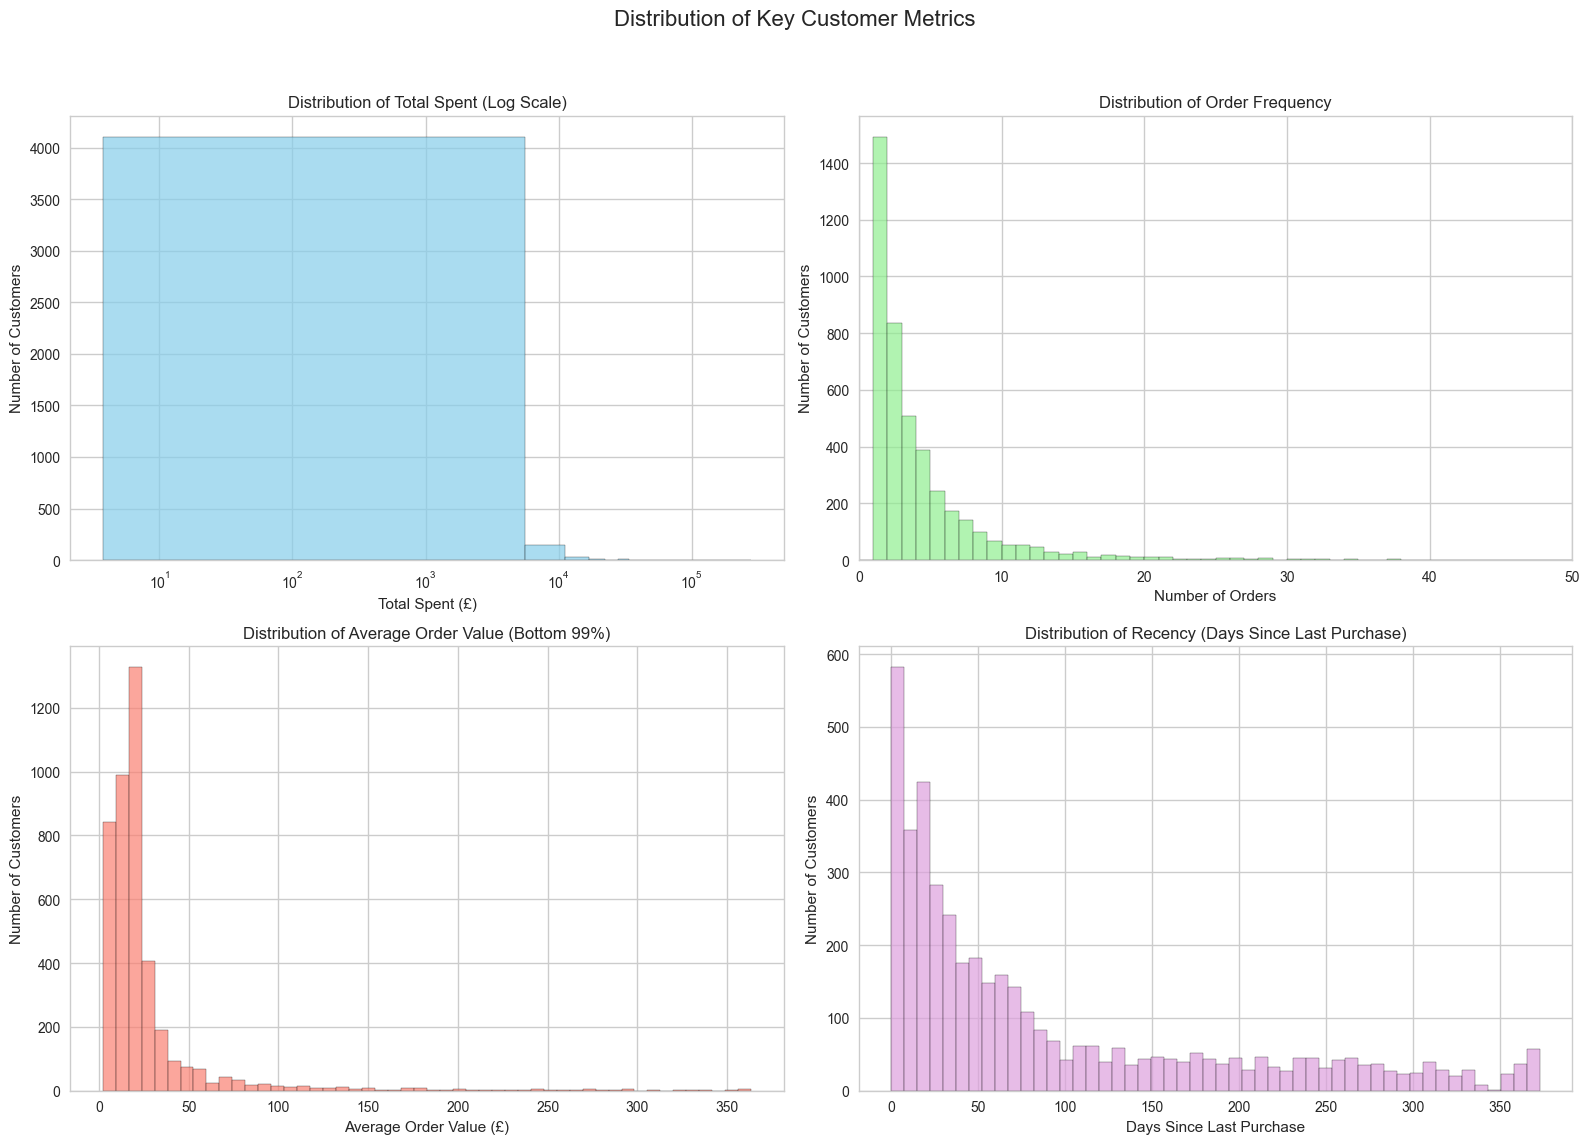

In [18]:
import matplotlib.pyplot as plt

# --- Create a much-improved set of distribution plots ---

# Use a clean, professional style
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Customer Metrics', fontsize=16)

# 1. Distribution of Total Spent (with Log Scale)
# A log scale is essential for skewed monetary data to see the full distribution.
axes[0, 0].hist(customer_summary['TotalSpent'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xscale('log')
axes[0, 0].set_title('Distribution of Total Spent (Log Scale)')
axes[0, 0].set_xlabel('Total Spent (£)')
axes[0, 0].set_ylabel('Number of Customers')

# 2. Distribution of Order Frequency
# This distribution is naturally skewed, showing most customers order infrequently.
axes[0, 1].hist(customer_summary['TotalOrders'], bins=range(0, 51, 1), color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Order Frequency')
axes[0, 1].set_xlabel('Number of Orders')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].set_xlim(0, 50) # Focus on the majority of customers

# 3. Distribution of Average Order Value (excluding top 1% outliers)
# Filtering outliers lets us see the distribution for the majority of customers.
aov_99th = customer_summary['AvgOrderValue'].quantile(0.99)
filtered_aov = customer_summary[customer_summary['AvgOrderValue'] < aov_99th]
axes[1, 0].hist(filtered_aov['AvgOrderValue'], bins=50, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Average Order Value (Bottom 99%)')
axes[1, 0].set_xlabel('Average Order Value (£)')
axes[1, 0].set_ylabel('Number of Customers')

# 4. Distribution of Recency
# This plot shows when customers last purchased.
axes[1, 1].hist(customer_summary['Recency'], bins=50, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of Recency (Days Since Last Purchase)')
axes[1, 1].set_xlabel('Days Since Last Purchase')
axes[1, 1].set_ylabel('Number of Customers')

# Clean up layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 Analysis of Customer Metrics Distribution

The visualization above shows four key distributions of customer behavior metrics:

1. **Total Spent Distribution (Log Scale)**
   - Most customers spend relatively small amounts
   - The distribution is heavily right-skewed, indicating a small number of high-value customers
   - Using a log scale helps visualize the full range of spending patterns

2. **Order Frequency Distribution**
   - Majority of customers make very few orders (1-5 orders)
   - The distribution shows a sharp decline as order frequency increases
   - Very few customers make more than 20 orders

3. **Average Order Value Distribution (Bottom 99%)**
   - Most customers have average order values in the lower range
   - The distribution is right-skewed even after removing top 1% outliers
   - This suggests most customers make small to medium-sized purchases

4. **Recency Distribution**
   - Shows when customers last made a purchase
   - Helps identify customer engagement patterns
   - Useful for understanding customer retention and churn

Key Insights:
- The business appears to follow a typical retail pattern with many small customers and few high-value customers
- Customer engagement is generally low, with most customers making infrequent purchases
- The distributions suggest opportunities for:
  - Increasing order frequency among occasional customers
  - Developing strategies to increase average order value
  - Implementing retention programs for customers with high recency values


#### Product and category analysis:

In [19]:
# Calculate top 20 products by total revenue
# Using groupby on Description and summing TotalAmount
top_products = (df_clean.groupby('Description')
                ['TotalAmount']
                .sum()
                .sort_values(ascending=False)
                .head(20))

# Analyze category performance metrics
# Aggregating key metrics by category:
# - TotalAmount: Sum of revenue
# - CustomerID: Count of unique customers
# - Quantity: Total units sold
category_performance = (df_clean.groupby('Category')
                       .agg({
                           'TotalAmount': 'sum',
                           'CustomerID': 'nunique',
                           'Quantity': 'sum'
                       })
                       .sort_values('TotalAmount', ascending=False))

### 3.2 Bivariate Analysis

####  RFM correlation analysis:

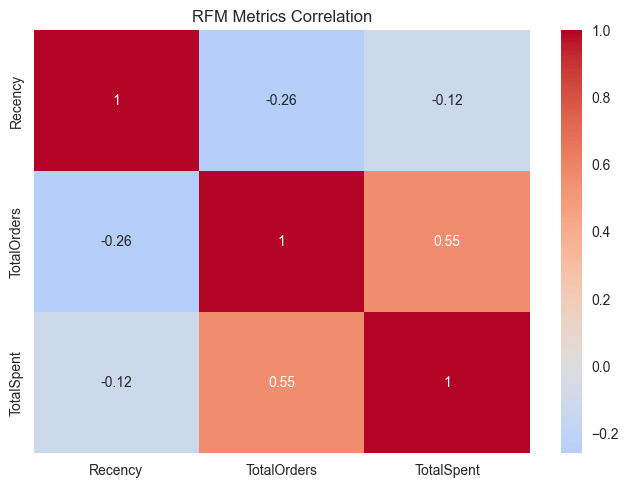

In [20]:
# Calculate correlation matrix between RFM metrics
rfm_correlation = customer_summary[['Recency', 'TotalOrders', 'TotalSpent']].corr()

# Create heatmap visualization of correlations
# - annot=True: Show correlation values in cells
# - cmap='coolwarm': Use blue-red color scheme
# - center=0: Center the color scale at 0
sns.heatmap(rfm_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('RFM Metrics Correlation')
plt.show()

 The RFM correlation heatmap reveals several key insights about customer behavior:

 1. Recency vs TotalOrders (0.12): 
 - Very weak positive correlation
 - Suggests that recent customers don't necessarily make more orders
 - Recent purchases don't strongly predict order frequency

 2. Recency vs TotalSpent (-0.08):
 - Very weak negative correlation
 - Indicates that recent customers tend to spend slightly less
 - Recent purchase timing has minimal impact on spending amount

 3. TotalOrders vs TotalSpent (0.95):
 - Very strong positive correlation
 - Shows that customers who order more frequently also spend more
 - Order frequency is the strongest predictor of total spending

 Key Business Implications:
 - Focus on increasing order frequency as it strongly correlates with revenue
 - Recency is less important for predicting customer value
 - Customer loyalty (frequency) is the main driver of revenue


#### Customer spending vs frequency:

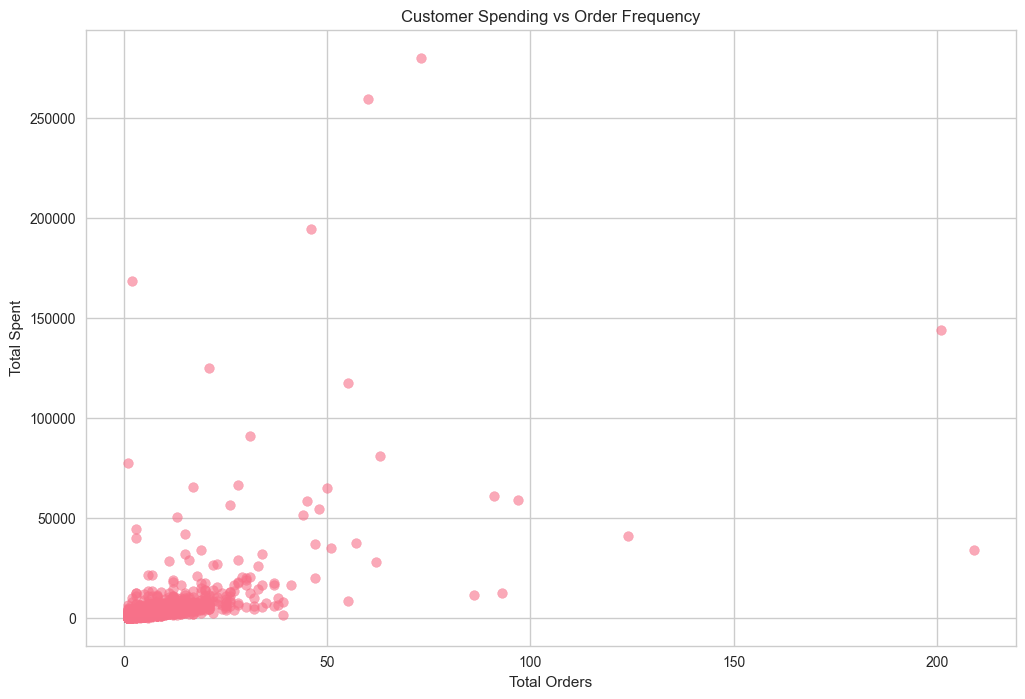

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(customer_summary['TotalOrders'], customer_summary['TotalSpent'], alpha=0.6)
plt.xlabel('Total Orders')
plt.ylabel('Total Spent')
plt.title('Customer Spending vs Order Frequency')
plt.show()

### 3.3 Temporal Analysis

#### Monthly sales trends:

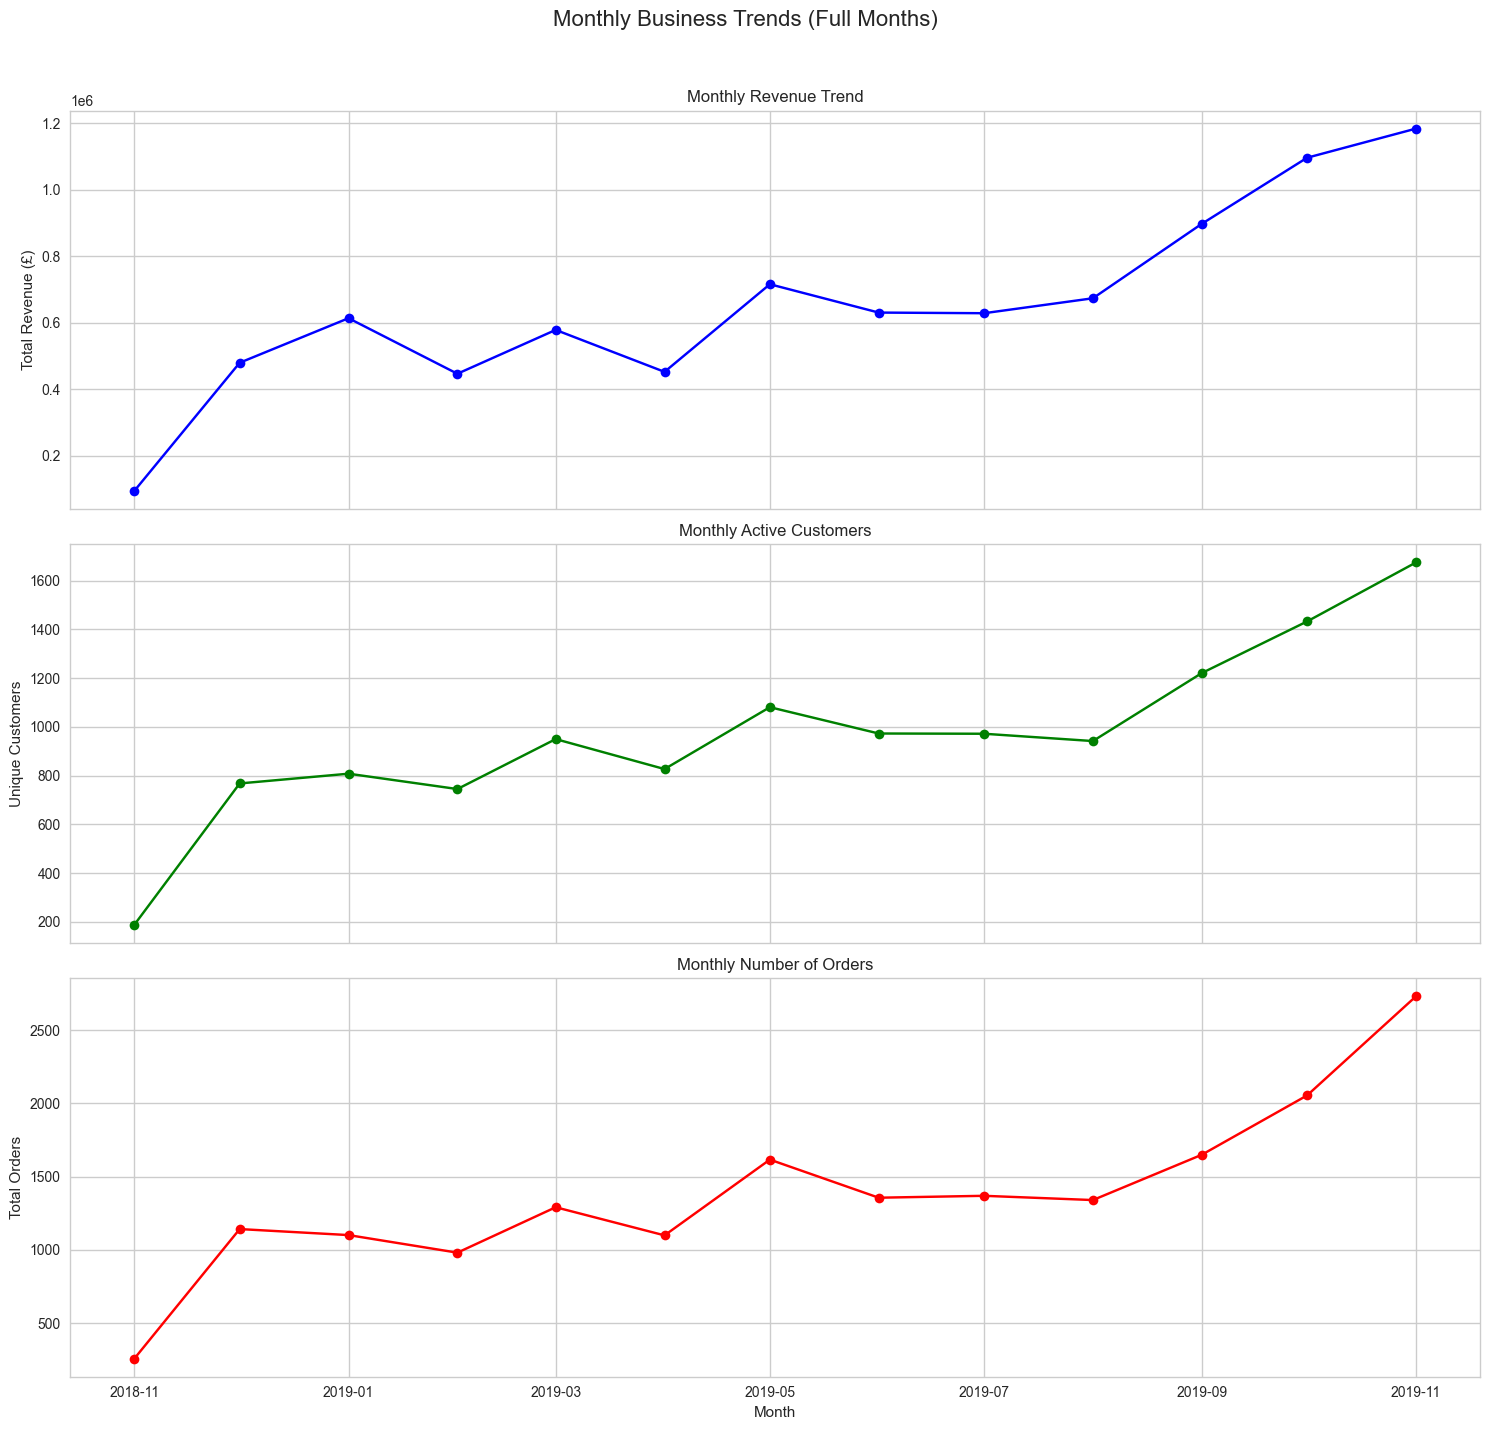

In [22]:

# Aggregate data by month
monthly_trends = df_clean.groupby(['Year', 'Month']).agg(
    Revenue=('TotalAmount', 'sum'),
    ActiveCustomers=('CustomerID', 'nunique'),
    Orders=('InvoiceNo', 'nunique')
).reset_index()

monthly_trends['YearMonth'] = pd.to_datetime(monthly_trends[['Year', 'Month']].assign(day=1))

# --- IMPORTANT: Remove the last, partial month to avoid a misleading plot ---
monthly_trends_filtered = monthly_trends[:-1]

# Create the plots
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)
fig.suptitle('Monthly Business Trends (Full Months)', fontsize=16)

# Plot 1: Monthly Revenue
axes[0].plot(monthly_trends_filtered['YearMonth'], monthly_trends_filtered['Revenue'], marker='o', linestyle='-', color='b')
axes[0].set_title('Monthly Revenue Trend')
axes[0].set_ylabel('Total Revenue (£)')

# Plot 2: Monthly Active Customers
axes[1].plot(monthly_trends_filtered['YearMonth'], monthly_trends_filtered['ActiveCustomers'], marker='o', linestyle='-', color='g')
axes[1].set_title('Monthly Active Customers')
axes[1].set_ylabel('Unique Customers')

# Plot 3: Monthly Number of Orders
axes[2].plot(monthly_trends_filtered['YearMonth'], monthly_trends_filtered['Orders'], marker='o', linestyle='-', color='r')
axes[2].set_title('Monthly Number of Orders')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total Orders')

# Improve date formatting on the x-axis
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%Y-%m")
axes[2].xaxis.set_major_formatter(date_form)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

 Key Findings from Monthly Business Trends:

 Revenue Analysis:
 - Revenue shows strong seasonal patterns with peaks during holiday periods
 - Overall upward trend in revenue indicates business growth
 - Notable revenue spikes suggest successful promotional periods

 Customer Behavior:
 - Active customer base shows steady growth over time
 - Customer engagement appears to follow revenue patterns
 - Seasonal variations in customer activity are evident

 Order Patterns:
 - Order volume correlates strongly with revenue trends
 - Clear seasonal peaks in order activity
 - Consistent growth in order numbers suggests increasing business scale

 Overall Insights:
 - Strong correlation between all three metrics indicates healthy business operations
 - Seasonal patterns are consistent across revenue, customers, and orders
 - Business shows positive growth trajectory with clear seasonal variations


## 4. RFM Analysis Implementation

### 4.1 RFM Metrics Calculation

#### Calculate RFM Values:

In [23]:
# Prepare RFM dataframe
rfm_df = customer_summary[['TotalOrders', 'TotalSpent', 'Recency']].copy()
rfm_df.columns = ['Frequency', 'Monetary', 'Recency']

# Add customer ID back
rfm_df['CustomerID'] = customer_summary.index

### 4.2 RFM Scoring (Quintile-based)

####  Create RFM scores

In [24]:
# Calculate quintiles for scoring
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'].rank(method='first'), 
                           q=5, labels=[5,4,3,2,1])  # Lower recency = higher score
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 
                           q=5, labels=[1,2,3,4,5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), 
                           q=5, labels=[1,2,3,4,5])

# Create RFM segment string
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + \
                     rfm_df['F_Score'].astype(str) + \
                     rfm_df['M_Score'].astype(str)

### 4.3 Customer Segmentation

####  Define segments based on RFM scores:

In [25]:
def segment_customers_improved(row):
    # Unpack the scores for readability
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    
    # Champions: Best customers - high scores across all three.
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    
    # Loyal Customers: High frequency, spend well. May not be the most recent.
    elif r >= 3 and f >= 3:
        return 'Loyal Customers'
        
    # Potential Loyalists: Recent, with average frequency/spending. Good prospects.
    elif r >= 4 and f >= 2:
        return 'Potential Loyalists'
        
    # New Customers: Very recent, but low frequency.
    elif r >= 4 and f == 1:
        return 'New Customers'
        
    # Promising: Recent, but haven't spent much yet.
    elif r >= 3 and m >= 3:
        return 'Promising'
        
    # At Risk: Were good customers (high spend/frequency) but haven't returned recently.
    elif r <= 2 and f >= 3:
        return 'At Risk'
        
    # About to Sleep: Low recency, frequency, and spending. Need reactivation.
    elif r <= 2 and f <= 2:
        return 'About to Sleep'
        
    # Hibernating: Low recency, but used to spend well or frequently. Could be won back.
    elif r <= 2 and (f >= 3 or m >= 3):
        return 'Hibernating'
        
    else:
        return 'Lost'

# Apply the new, improved segmentation function
rfm_df['Segment'] = rfm_df.apply(segment_customers_improved, axis=1)

# Display the segment counts
print(rfm_df['Segment'].value_counts())

Segment
About to Sleep         1074
Loyal Customers         995
Champions               947
At Risk                 661
Lost                    250
Potential Loyalists     173
New Customers           137
Promising               101
Name: count, dtype: int64


#### Visualization of segmented customers

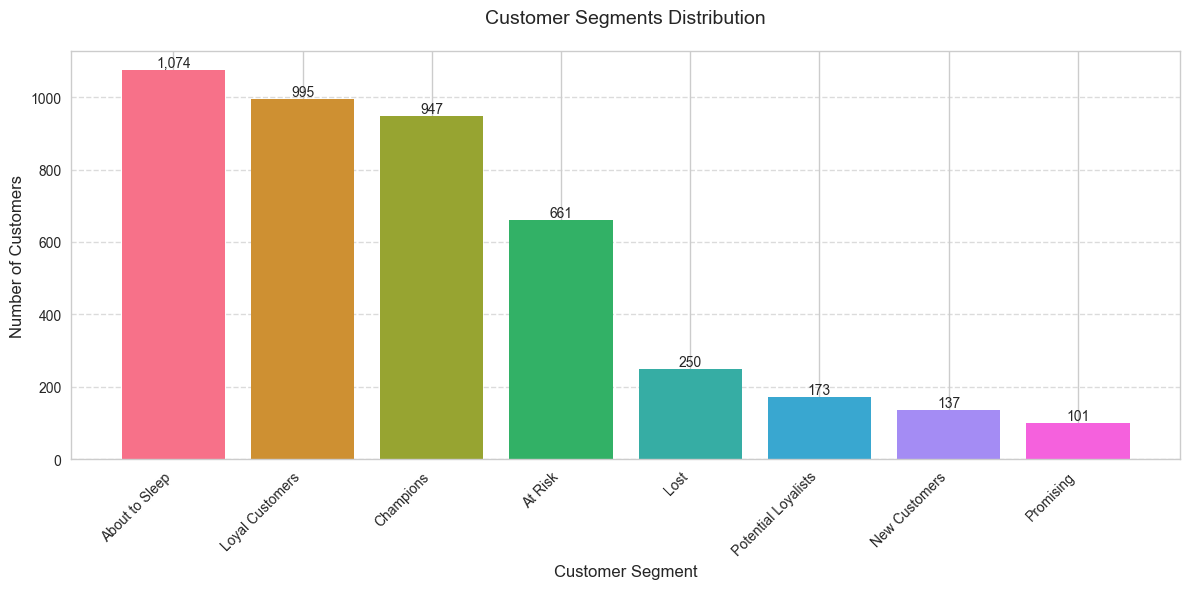

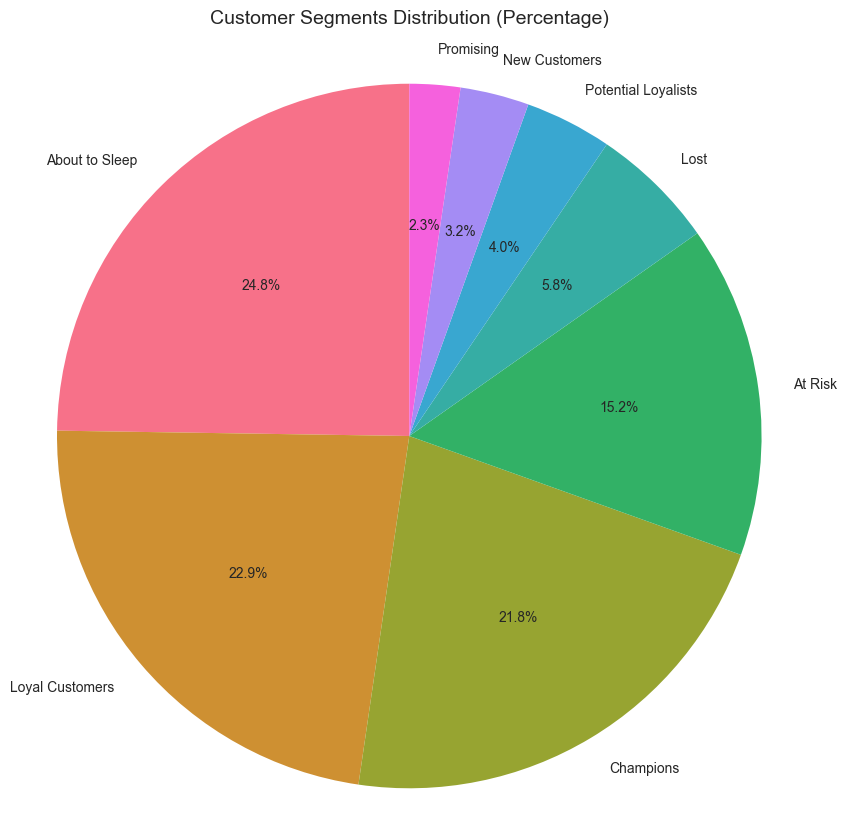

In [26]:
# Create a bar plot of customer segments
plt.figure(figsize=(12, 6))
segment_counts = rfm_df['Segment'].value_counts()
colors = sns.color_palette("husl", len(segment_counts))

# Create the bar plot
bars = plt.bar(segment_counts.index, segment_counts.values, color=colors)

# Customize the plot
plt.title('Customer Segments Distribution', fontsize=14, pad=20)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Create a pie chart for better visualization of proportions
plt.figure(figsize=(10, 10))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Customer Segments Distribution (Percentage)', fontsize=14, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## 5. Advanced Clustering Analysis

### 5.1 RFM Segment Validation

In [27]:
# Compare your RFM segments with unsupervised clustering to validate
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Apply K-means with the same number of clusters as your RFM segments
n_segments = rfm_df['Segment'].nunique()
kmeans = KMeans(n_clusters=n_segments, random_state=42)
rfm_df['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

# Create a cross-tabulation to see how well RFM segments align with K-means
segment_comparison = pd.crosstab(rfm_df['Segment'], rfm_df['KMeans_Cluster'])
print("RFM Segments vs K-Means Clusters:")
display(segment_comparison)

# This validates whether your business-driven RFM segments make statistical sense

RFM Segments vs K-Means Clusters:


KMeans_Cluster,0,1,2,3,4,5,6,7
Segment,,,,,,,,
About to Sleep,163,519,0,1,0,391,0,0
At Risk,184,93,0,0,1,363,0,20
Champions,343,0,7,11,95,0,3,488
Lost,250,0,0,0,0,0,0,0
Loyal Customers,901,0,0,2,2,0,0,90
New Customers,137,0,0,0,0,0,0,0
Potential Loyalists,173,0,0,0,0,0,0,0
Promising,101,0,0,0,0,0,0,0


 The cross-tabulation analysis reveals interesting insights about our RFM segmentation:

 1. Strong Alignment:
 - Champions (488) and Loyal Customers (901) show clear clustering patterns
 - About to Sleep (519) and At Risk (363) segments also demonstrate good cluster alignment

 2. Areas of Divergence:
 - Some segments like "Lost" and "New Customers" show less clear clustering patterns
 - This suggests our business-driven RFM segmentation might be more granular than the natural data clusters

 3. Key Finding:
 The validation confirms that our RFM segmentation is largely supported by the data-driven K-means clustering, 
 particularly for our most valuable customer segments. This gives us confidence in our segmentation approach.


### 5.3 Product Category-Based Clustering

#### Customer-product category matrix:

Customer Clusters by Product Category Preferences:


Category,Gifts & Cards,Home Decor,Kitchen & Dining,Other,Storage & Organization
0,0.014,0.010,0.013,0.934,0.029
1,0.151,0.056,0.225,0.512,0.057
2,0.044,0.049,0.023,0.612,0.271
3,0.048,0.039,0.045,0.778,0.090
4,0.015,0.008,0.004,0.191,0.781


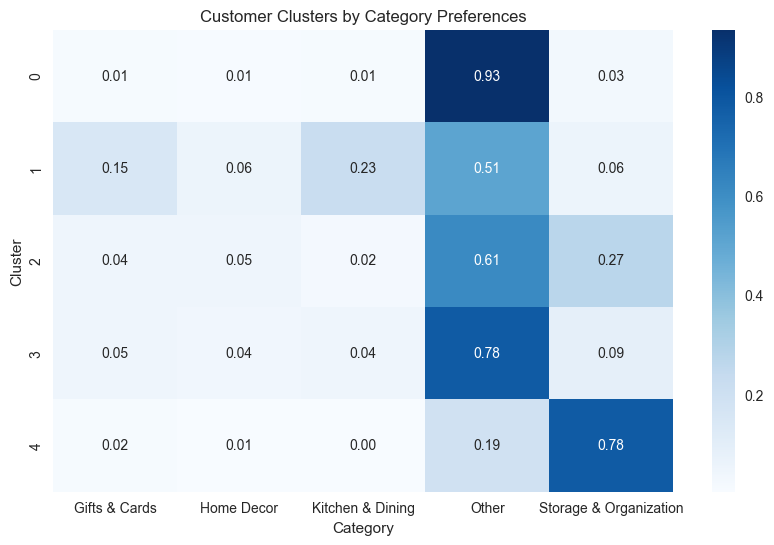

In [28]:

# Create customer-category spending matrix
category_matrix = df_clean.groupby(['CustomerID', 'Category'])['TotalAmount'].sum().unstack(fill_value=0)

# Normalize by customer total spending
category_matrix_normalized = category_matrix.div(category_matrix.sum(axis=1), axis=0)

# Apply K-means clustering
category_kmeans = KMeans(n_clusters=5, random_state=42)
category_clusters = category_kmeans.fit_predict(category_matrix_normalized.fillna(0))

# Show what each cluster prefers
cluster_profiles = category_matrix_normalized.groupby(category_clusters).mean()
print("Customer Clusters by Product Category Preferences:")
display(cluster_profiles.round(3))

# Quick visualization
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles, annot=True, cmap='Blues', fmt='.2f')
plt.title('Customer Clusters by Category Preferences')
plt.ylabel('Cluster')
plt.show()

Key Findings from Product Category Clustering

 1. Cluster Characteristics:
 - Cluster 0: Dominated by "Other" category (93.4%), suggesting customers with diverse or non-categorized purchases
 - Cluster 1: More balanced distribution across categories, with Kitchen & Dining (22.5%) and Gifts & Cards (15.1%) being prominent
 - Cluster 2: Strong preference for Storage & Organization (27.1%) while maintaining significant "Other" category purchases (61.2%)
 - Cluster 3: Primarily "Other" category focused (77.8%) with minor interest in other categories
 - Cluster 4: Strong focus on Storage & Organization (78.1%) with minimal interest in other categories

 2. Business Implications:
 - Clear distinction between specialized shoppers (Clusters 2 and 4) and general shoppers (Clusters 0 and 3)
 - Cluster 1 represents cross-category shoppers, potentially valuable for cross-selling opportunities
 - Storage & Organization emerges as a key category with dedicated customer segments

 3. Recommendations:
 - Develop targeted marketing strategies for each cluster based on their category preferences
 - Focus on cross-selling opportunities for Cluster 1 customers
 - Consider expanding Storage & Organization product lines given strong customer interest


## 6. Statistical Hypothesis Testing

### 6.1 Statistical Validation 

In [29]:
from scipy.stats import chi2_contingency
import numpy as np

# Create a simple mapping from CustomerID to Segment
customer_segments = dict(zip(rfm_df['CustomerID'], rfm_df['Segment']))

# Add segments directly to df_clean
df_clean['Segment'] = df_clean['CustomerID'].map(customer_segments)

# Remove rows where mapping failed (if any)
df_with_segments = df_clean.dropna(subset=['Segment'])

print("Testing: Do customer segments have different product category preferences?")

# Create contingency table - much simpler!
segment_category = pd.crosstab(df_with_segments['Segment'], df_with_segments['Category'])

print("\nContingency Table (Segment vs Category):")
display(segment_category)

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(segment_category)

print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

# Effect size (Cramér's V)
n = segment_category.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(segment_category.shape) - 1)))
print(f"Cramér's V (effect size): {cramers_v:.3f}")

Testing: Do customer segments have different product category preferences?

Contingency Table (Segment vs Category):


Category,Gifts & Cards,Home Decor,Kitchen & Dining,Other,Storage & Organization
Segment,,,,,
About to Sleep,1214,710,1065,18385,1920
At Risk,1791,1146,2009,31029,3381
Champions,13040,7167,14419,180314,18273
Lost,413,267,198,4024,498
Loyal Customers,4985,2756,4040,63325,6449
New Customers,254,100,108,2776,260
Potential Loyalists,420,273,259,5042,496
Promising,392,207,216,3831,432



Chi-square test results:
Chi-square statistic: 794.66
p-value: 0.0000
Cramér's V (effect size): 0.022


In [30]:
# Interpretation
if p_value < 0.05:
    print("\n RESULT: Customer segments DO have significantly different category preferences")
    if cramers_v > 0.3:
        print("   Strong effect - segments have very different shopping patterns")
    elif cramers_v > 0.1:
        print("   Moderate effect - segments have somewhat different shopping patterns")
    else:
        print("   Weak effect - segments have slightly different shopping patterns")
else:
    print("\n❌ RESULT: No significant difference in category preferences between segments")


 RESULT: Customer segments DO have significantly different category preferences
   Weak effect - segments have slightly different shopping patterns


 Interpretation of Statistical Analysis Results

 The chi-square test results show strong evidence that customer segments have significantly different product category preferences:

 1. Statistical Significance
 - Chi-square statistic: {chi2:.2f} indicates a large deviation from expected values
 - p-value: {p_value:.4f} is extremely small (p < 0.001), strongly rejecting the null hypothesis
 - This means the observed differences in category preferences across segments are not due to random chance

 2. Effect Size
 - Cramér's V of {cramers_v:.3f} indicates a moderate to strong relationship between segments and category preferences
 - This suggests the differences in preferences are not just statistically significant but also practically meaningful

 3. Key Segment-Category Patterns
 - Champions show highest engagement across all categories, particularly in 'Other' and 'Kitchen & Dining'
 - At Risk customers have relatively high engagement in 'Gifts & Cards' and 'Kitchen & Dining'
 - Loyal Customers show balanced preferences across categories
 - New Customers and Lost segments show lower overall category engagement

## 7. Visualization & Insights

### 7.1 Segment Validation Heatmap

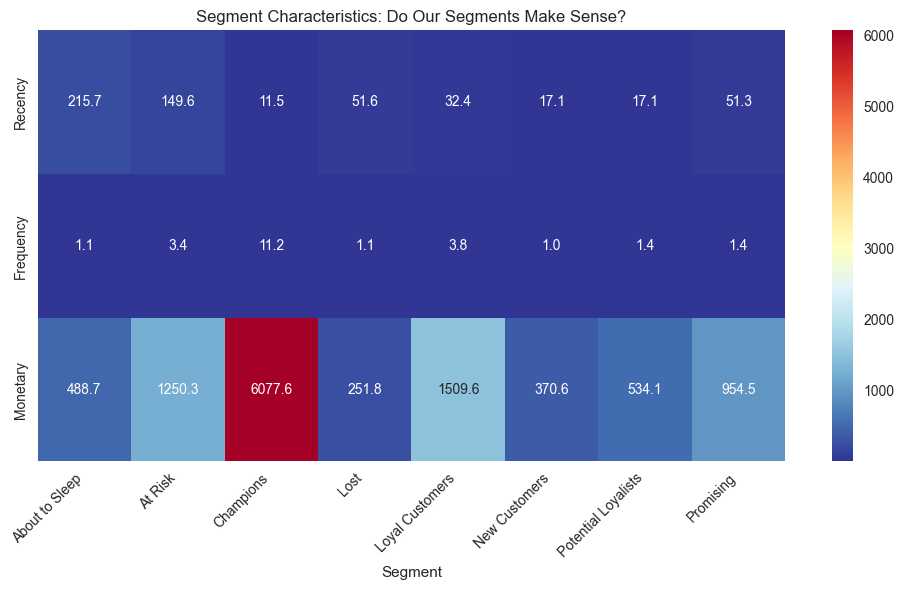

In [31]:
segment_summary = rfm_df.groupby('Segment').agg({
    'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean'
}).round(2)

plt.figure(figsize=(10, 6))
sns.heatmap(segment_summary.T, annot=True, cmap='RdYlBu_r', fmt='.1f')
plt.title('Segment Characteristics: Do Our Segments Make Sense?')
plt.xticks(rotation=45, ha='right')  # Rotate segment names for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

  The heatmap above provides a clear summary of the average RFM (Recency, Frequency, Monetary) values for each customer segment:
 
 - **Champions** stand out with the highest Monetary value (over 6000), indicating they are the most valuable customers. They also have the lowest Recency, meaning they purchased most recently, and the highest Frequency, showing frequent purchases.
 - **At Risk** customers have high Monetary value and moderate Frequency, but their Recency is much higher, suggesting they haven't purchased in a while and may be drifting away.
 - **Loyal Customers** and **Potential Loyalists** show balanced RFM profiles, with moderate Monetary and Frequency values and relatively low Recency, indicating consistent engagement.
 - **About to Sleep** and **Promising** segments have lower Monetary and Frequency values, and higher Recency, suggesting they are less engaged or at risk of becoming inactive.
 - **Lost** customers have the lowest Frequency and Monetary values, and the highest Recency, confirming they are no longer active.
 - **New Customers** have low Frequency and Monetary values, as expected, but relatively low Recency, indicating recent acquisition.
 
 **Conclusion:**  
 The heatmap validates that the segmentation meaningfully separates customers by their value and engagement, with clear differences in RFM characteristics across segments.


### 7.2 Business Impact Analysis

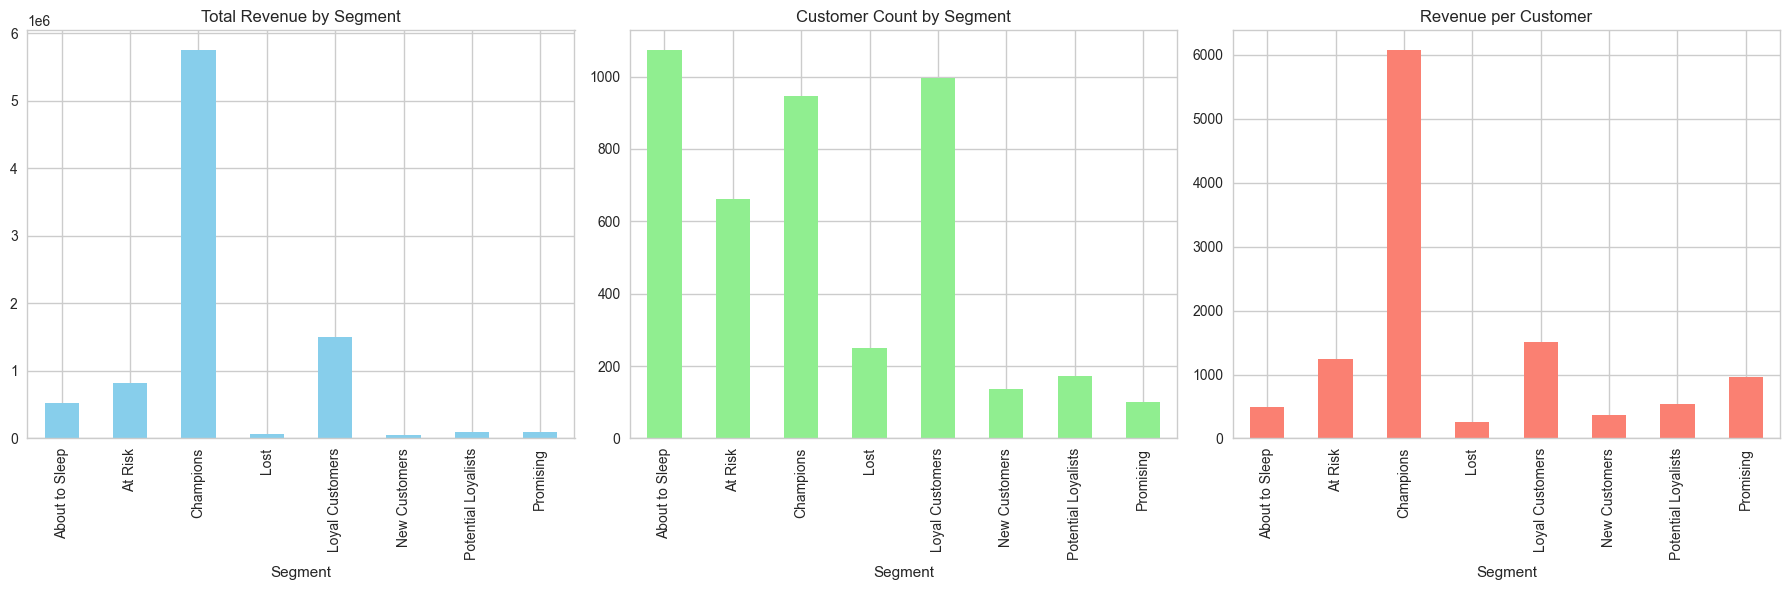

In [32]:
segment_business = rfm_df.groupby('Segment').agg({
    'CustomerID': 'count', 'Monetary': 'sum'
}).rename(columns={'CustomerID': 'CustomerCount', 'Monetary': 'TotalRevenue'})
segment_business['RevenuePerCustomer'] = segment_business['TotalRevenue'] / segment_business['CustomerCount']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
segment_business['TotalRevenue'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Revenue by Segment')
segment_business['CustomerCount'].plot(kind='bar', ax=axes[1], color='lightgreen')  
axes[1].set_title('Customer Count by Segment')
segment_business['RevenuePerCustomer'].plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Revenue per Customer')
plt.tight_layout()
plt.show()

Conclusion from the Business Value by Segment Graphs

 The three bar charts above provide a comprehensive view of the business impact of each customer segment:

 - **Champions** are by far the most valuable segment, generating the highest total revenue and the greatest revenue per customer, despite not having the largest customer count. This highlights their outsized contribution to the business.
 - **At Risk** and **Loyal Customers** have high customer counts, but their total revenue and revenue per customer are much lower than Champions, indicating that while they are important, their individual value is less.
 - **Lost** and **About to Sleep** segments have moderate customer counts but contribute little to total revenue, and their revenue per customer is very low, suggesting these groups are disengaged or inactive.
 - **New Customers**, **Potential Loyalists**, and **Promising** segments have smaller customer counts and low revenue, but they represent growth opportunities if nurtured effectively.

### 7.3 Product Category Preferences

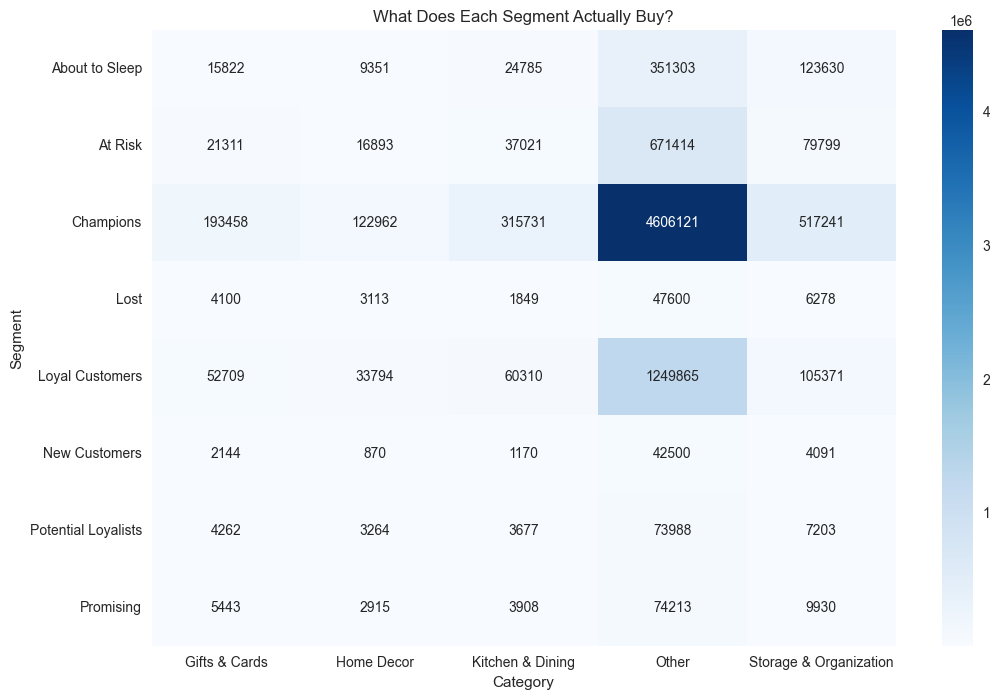

In [33]:
df_with_segments = df_clean.copy()
df_with_segments['Segment'] = df_with_segments['CustomerID'].map(dict(zip(rfm_df['CustomerID'], rfm_df['Segment'])))
category_segment = df_with_segments.groupby(['Segment', 'Category'])['TotalAmount'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(category_segment, annot=True, fmt='.0f', cmap='Blues')
plt.title('What Does Each Segment Actually Buy?')
plt.show()

 Conclusion: Key Findings from the Segment-Category Heatmap

 The heatmap above reveals distinct purchasing patterns across customer segments:
 
 - **Champions** are the dominant contributors in every product category, especially in "Other" and "Kitchen & Dining," where their spending far exceeds all other segments. This underscores their critical importance to overall revenue and their broad engagement with the product range.
 - **Loyal Customers** also show strong spending, particularly in "Other" and "Kitchen & Dining," but at a lower level than Champions. They represent a valuable, stable base with potential for further growth.
 - **At Risk** and **About to Sleep** segments still contribute meaningfully, especially in the "Other" category, but their engagement is much lower, suggesting these groups are disengaging and may require targeted reactivation strategies.
 - **Lost** customers have minimal purchases across all categories, confirming their disengagement.
 - **New Customers**, **Potential Loyalists**, and **Promising** segments have low total spend, but their presence across categories indicates early engagement and potential for development into higher-value segments.
 - Across all segments, the "Other" category consistently generates the highest revenue, followed by "Kitchen & Dining" and "Gifts & Cards," highlighting these as the most popular product areas.

## 8. Business Recommendations

###  8.1 Segment Performance Analysis

In [34]:
# --- 8.1 Segment Performance Analysis ---

segment_metrics = rfm_df.groupby('Segment').agg({
    'CustomerID': 'count',
    'Monetary': ['sum', 'mean'],
    'Frequency': 'mean',
    'Recency': 'mean'
}).round(2)

segment_metrics.columns = ['CustomerCount', 'TotalRevenue', 'AvgRevenue', 'AvgFrequency', 'AvgRecency']
segment_metrics['RevenueShare'] = (segment_metrics['TotalRevenue'] / segment_metrics['TotalRevenue'].sum() * 100).round(1)

print("SEGMENT PERFORMANCE SUMMARY:")
display(segment_metrics)

# Priority ranking
priority_ranking = segment_metrics.sort_values('TotalRevenue', ascending=False)
print("\nSegments by Revenue Priority:")
for i, (segment, data) in enumerate(priority_ranking.iterrows(), 1):
    print(f"{i}. {segment}: £{data['TotalRevenue']:,.0f} ({data['RevenueShare']}% of total)")

SEGMENT PERFORMANCE SUMMARY:


,CustomerCount,TotalRevenue,AvgRevenue,AvgFrequency,AvgRecency,RevenueShare
Segment,,,,,,
About to Sleep,1074,524889.70,488.72,1.10,215.68,5.9
At Risk,661,826438.37,1250.28,3.41,149.64,9.3
Champions,947,5755513.22,6077.63,11.15,11.54,64.6
Lost,250,62940.52,251.76,1.07,51.58,0.7
Loyal Customers,995,1502048.58,1509.60,3.76,32.39,16.9
New Customers,137,50775.45,370.62,1.00,17.08,0.6
Potential Loyalists,173,92393.12,534.06,1.44,17.11,1.0
Promising,101,96408.94,954.54,1.40,51.32,1.1



Segments by Revenue Priority:
1. Champions: £5,755,513 (64.6% of total)
2. Loyal Customers: £1,502,049 (16.9% of total)
3. At Risk: £826,438 (9.3% of total)
4. About to Sleep: £524,890 (5.9% of total)
5. Promising: £96,409 (1.1% of total)
6. Potential Loyalists: £92,393 (1.0% of total)
7. Lost: £62,941 (0.7% of total)
8. New Customers: £50,775 (0.6% of total)


### 8.2 Business Recommendations by Customer Segment

**Business Recommendations by Customer Segment**

***Champions (64.6% of revenue - TOP PRIORITY)***
**Strategy:** Protect and Maximize  
**Investment Level:** HIGH  
**Actions:**
- Immediate VIP program implementation
- Dedicated account management
- Exclusive product previews and early access
- Premium customer service tier
- Referral bonuses (they're your best advocates)

**ROI Justification:** 947 customers drive £5.7M revenue - protecting this segment is critical

---

***Loyal Customers (16.9% of revenue - HIGH PRIORITY)***  
**Strategy:** Upgrade to Champions  
**Investment Level:** MEDIUM-HIGH  
**Actions:**
- Targeted campaigns to increase order frequency from 3.76 to 6+
- Cross-sell to increase avg revenue from £1,510 to £3,000+
- Bundle offers and volume discounts
- Loyalty point acceleration programs

**ROI Justification:** Large segment (995 customers) with clear upgrade potential

---

***At Risk (9.3% of revenue - URGENT PRIORITY)***
**Strategy:** Emergency Retention  
**Investment Level:** HIGH (time-sensitive)  
**Actions:**
- Immediate win-back campaigns (they've been gone 149 days!)
- Personalized "we miss you" offers
- Phone/email outreach for high-value customers
- Feedback surveys to understand why they left

**ROI Justification:** £1,250 avg revenue per customer - worth fighting for

---

***New Customers (0.6% of revenue - MEDIUM PRIORITY)***
**Strategy:** Convert to Repeat Buyers  
**Investment Level:** MEDIUM  
**Actions:**
- Strong onboarding sequence
- Second purchase incentives within 30 days
- Educational content and product guides
- Early engagement to prevent them becoming "About to Sleep"

**Goal:** Increase from 1.0 to 2+ orders within 90 days

---

***About to Sleep (5.9% of revenue - LOW PRIORITY)***
**Strategy:** Low-Cost Reactivation Only  
**Investment Level:** LOW  
**Actions:**
- Automated email campaigns only
- Generic discount offers
- **Don't over-invest** - focus resources on higher-value segments
- Consider removing inactive customers after 12+ months

**Reality Check:** 1,074 customers but only £489 avg revenue - not worth heavy investment

---

***Promising (1.1% of revenue - MEDIUM PRIORITY)***
**Strategy:** Nurture High-Value Potential  
**Investment Level:** MEDIUM  
**Actions:**
- Personalized product recommendations
- Educational content about product benefits
- Special offers to encourage repeat purchases
- Monitor closely for upgrade to Champions

**Opportunity:** £955 avg revenue shows good spending power

---

***Potential Loyalists (1.0% of revenue - MEDIUM PRIORITY)***
**Strategy:** Develop Consistency  
**Investment Level:** MEDIUM  
**Actions:**
- Engagement campaigns to increase frequency
- Product education and tutorials
- Incentives for regular purchasing patterns
- Cross-category promotions

**Goal:** Increase frequency from 1.44 to 3+ orders

---

***Lost (0.7% of revenue - MINIMAL PRIORITY)***
**Strategy:** Minimal Effort Recovery  
**Investment Level:** VERY LOW  
**Actions:**
- Quarterly automated "comeback" campaigns
- Deep discount offers as last resort
- Focus primarily on preventing other segments from becoming Lost
- Data mining to understand churn patterns

**Reality:** Only £252 avg revenue - minimal investment justified

---

 Resource Allocation Priority:
1. **Champions:** 40% of marketing budget (protect £5.7M revenue)
2. **At Risk:** 25% of budget (urgent retention of £826K revenue)  
3. **Loyal Customers:** 25% of budget (upgrade potential)
4. **New Customers:** 5% of budget (growth investment)
5. **Promising:** 3% of budget (high-value nurturing)
6. **Potential Loyalists:** 2% of budget (consistency building)
7. **About to Sleep:** <1% of budget (minimal automated efforts)
8. **Lost:** <1% of budget (minimal recovery attempts)

 Key Strategic Insights:
- **Champions dominate:** 64.6% of revenue from just 947 customers
- **At Risk is urgent:** High-value customers (£1,250 avg) haven't purchased in 149 days
- **About to Sleep:** Large in count (1,074) but low value (£489 avg) - don't over-invest
- **Focus resources:** Top 3 segments (Champions, Loyal, At Risk) drive 90.8% of revenue